# Data Science Questions.  Author: <br>Justin Clifton

Hello, and thank you for viewing my notebook. This notebook was created to answer preliminary questions for a data science internship. 

---
## Table of Contents

1. [Question 1](#question1)
    2. [Question 1 B](#question1b)
    3. [Question 1 C](#question1c)
2. [Question 2](#question2)
    1. [Question 2 A](#question2b)
    2. [Question 2 B](#question2b) 
3. [Question 3](#question3)
3. [Question 4](#question4)
3. [Question 5](#question5)


---

# Question 1 <a class="anchor" id="question1"></a>

## a) <a class="anchor" id="question1a"></a> 
Based on the following two tables, write a SQL query that returns the name and student ID of all students that have a higher total marks score than the student that has StudentID of 'V002’.

![name_table](images/name_table.png)
![mark_table](images/mark_table.png)

The solution to this question is contained in another file. It can be found at:

https://github.com/jdclifton2/DataScienceQuestions/blob/main/query.sql

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
name_table = pd.DataFrame(columns = ['Name'], index = ['V001','V002','V003','V004'], data = ['Abe', 'Abhay', 'Acelin', 'Adelphos'])
name_test = pd.DataFrame(columns = ['Name'], index = ['V001','V002','V003','V004','V005','V006'], data = ['Gabe', 'eee', 'aaE', 'aaa','Justin',"Todd"])
mark_table = pd.DataFrame(columns = ['Total_marks'], index = ['V001','V002','V003','V004'], data = [95, 80, 74, 81])

## b) <a class="anchor" id="question1b"></a>

Assume that the two tables are pandas data frame variables. Based on those two data frames--utilizing pandas--write a python function that returns a new data frame version of name_table, where each name containing the letter “e” is uppercased, and lowercased otherwise (e.g. “Edward” → “EDWARD”, “Bob” → “bob”).





In [3]:
def upper_if_e(name_table):
    """
    returns a new data frame version of name_table, where each name containing the letter “e” is uppercased, 
    and lowercased otherwise.
    
    :param name_table: A dataframe containing the names of people.
    :return: A new dataframe where every name that contained the letter 'e' is uppercased and names that
    did contain 'e' are lower cased. 
    :rtype: Dataframe
    
    Example: “Edward” → “EDWARD”, “Bob” → “bob”
    """
    names = name_table['Name']
    new_df = name_table.copy()
    #if the string does not contain e. ~ is the negation operator.
    new_df.loc[~ new_df.Name.str.contains('e'), 'Name'] = new_df.Name.str.lower()
    new_df.loc[new_df.Name.str.contains('e'), 'Name'] = new_df.Name.str.upper()
    return new_df

In [4]:
upper_if_e(name_test)

,Name
V001,GABE
V002,EEE
V003,AAE
V004,aaa
V005,justin
V006,todd


In [5]:
cased_df = upper_if_e(name_table)
cased_df

,Name
V001,ABE
V002,abhay
V003,ACELIN
V004,ADELPHOS


## c) <a class="anchor" id="question1c"></a>
Now write a function that takes in the output of 1) b) and mark_table and returns a data frame that summarizes the average grade of uppercase names and lowercase names

In [6]:
def summarize_avg_grade(new_name_table, mark_table):
    """
    returns a new data frame containing the average of the grades contained within mark_table for uppercased 
    names and lowercased names contained within new_name_table.
    
    :param new_name_table: A dataframe containing the names of people. The names should be all uppercased or all
    lowercased.
    :param mark_table: A dataframe containing grades.
    :return: A new dataframe containing the average score for upper case names and lower case names.
    :rtype: Dataframe
    
    """
    #merge the dataframes by their index. 
    combined_df = new_name_table.merge(mark_table, left_index=True, right_index=True)
    upper_avg = combined_df[combined_df.Name.str.isupper()].mean()
    lower_avg = combined_df[combined_df.Name.str.islower()].mean()
    averages_df = pd.DataFrame({"Uppercase Average": upper_avg, "Lowercase Average": lower_avg})
    return averages_df
    

In [7]:
summarize_avg_grade(cased_df, mark_table)

,Uppercase Average,Lowercase Average
Total_marks,83.333333,80.0


# Question 2.  <a class="anchor" id="question2"></a>

##  a) <a class="anchor" id="question2a"></a>

Consider the dataset below:

https://github.com/helloworlddata/white-house-salaries/blob/master/data/converted/2017.csv


Write some python code that illustrates some common feature engineering and/or data preparation tasks.  


In [8]:
wh_salaries_df = pd.read_csv('https://raw.githubusercontent.com/helloworlddata/white-house-salaries/master/data/converted/2017.csv')

First we will take a look at our dataset. It appears that salary is a string. If we would like to do any predictions using this variable, it will need to be a number. It also appears that we could engineer some features based on the position title.

In [9]:
wh_salaries_df.head()

,NAME,STATUS,SALARY,PAY BASIS,POSITION TITLE
0,"Alexander, Monica K.",Employee,"$56,000.00",Per Annum,EXECUTIVE ASSISTANT
1,"Ambrosini, Michael J.",Employee,"$95,000.00",Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTO...
2,"Amin, Stacy C.",Employee,"$140,000.00",Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND ASSOCIA...
3,"Andersen, Whitney N.",Employee,"$94,000.00",Per Annum,DEPUTY DIRECTOR OF OPERATIONS FOR THE WHITE HO...
4,"Anderson, Alexander J.",Employee,"$77,000.00",Per Annum,DIRECTOR OF DIGITAL ENGAGEMENT


In [10]:
wh_salaries_df.describe()

,NAME,STATUS,SALARY,PAY BASIS,POSITION TITLE
count,377,377,377,377,375
unique,377,2,74,3,214
top,"Pataki, Timothy A.",Employee,"$115,000.00",Per Annum,EXECUTIVE ASSISTANT
freq,1,359,46,375,20


We will now check for missing data.

In [11]:
wh_salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   NAME            377 non-null    object
 1   STATUS          377 non-null    object
 2   SALARY          377 non-null    object
 3   PAY BASIS       377 non-null    object
 4   POSITION TITLE  375 non-null    object
dtypes: object(5)
memory usage: 14.9+ KB


In [12]:
wh_salaries_df['POSITION TITLE'].isnull().sum()

2

In [13]:
wh_salaries_df.dropna(inplace = True)

We will now check to make sure that every object in the salary column is a string.

In [14]:
wh_salaries_df['SALARY'].apply(type).value_counts()

<class 'str'>    375
Name: SALARY, dtype: int64

In [15]:
def clean_salary(str_salary):
    """ 
    If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    
    :param str_salary: A string of a salary.
    :return: A version of the salary with delimiters and currency symbol removed.
    """
    if isinstance(str_salary, str):
        return(str_salary.replace('$', '').replace(',', ''))
    return str_salary

In [16]:
wh_salaries_df['SALARY'] = wh_salaries_df['SALARY'].apply(clean_salary).astype('float')

We have successfully converted all salaries to floats. Now they can be used for models. Now we will engineer features based on key words in the title of the position. If we leave the title as a string, we cannot work with it in our models. Converting it allows us to keep the information. Furthermore, certain titles might correlate with higher salaries or experience, so these are features worth having. 

In [17]:
wh_salaries_df.head()

,NAME,STATUS,SALARY,PAY BASIS,POSITION TITLE
0,"Alexander, Monica K.",Employee,56000.0,Per Annum,EXECUTIVE ASSISTANT
1,"Ambrosini, Michael J.",Employee,95000.0,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTO...
2,"Amin, Stacy C.",Employee,140000.0,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND ASSOCIA...
3,"Andersen, Whitney N.",Employee,94000.0,Per Annum,DEPUTY DIRECTOR OF OPERATIONS FOR THE WHITE HO...
4,"Anderson, Alexander J.",Employee,77000.0,Per Annum,DIRECTOR OF DIGITAL ENGAGEMENT


In [18]:
def add_titles(desired_title, wh_salaries_df):
    """ 
    Searches for the desired_title in wh_salaries_df['Position Title']. A new dataframe will be created. If the 
    position title string contains the desired_title, the corresponding row will recieve a 1 in the new column
    and a 0 otherwise.
    
    
    :param desired_title: The desired title to be searched for.
    :param wh_salaries_df: The dataframe of whitehouse employees. 
    :return: A new version of the wh_salaries_df with an added column that says whether the desired title was
    in the corresponding row's Position Title.
    """
    special_title = wh_salaries_df['POSITION TITLE'].apply(lambda title: 1 if desired_title in title else 0)
    special_title.rename("Title {}".format(desired_title), inplace = True)
    wh_salaries_df = pd.concat([wh_salaries_df, special_title], axis = 1)
    return wh_salaries_df


wh_salaries_df['POSITION TITLE'].unique()

array(['EXECUTIVE ASSISTANT',
       'SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTOR OF THE OFFICE OF THE CHIEF OF STAFF',
       'SPECIAL ASSISTANT TO THE PRESIDENT AND ASSOCIATE COUNSEL TO THE PRESIDENT',
       'DEPUTY DIRECTOR OF OPERATIONS FOR THE WHITE HOUSE MANAGEMENT OFFICE',
       'DIRECTOR OF DIGITAL ENGAGEMENT',
       'SPECIAL ASSISTANT TO THE PRESIDENT FOR LEGISLATIVE AFFAIRS',
       'SPECIAL ASSISTANT TO THE PRESIDENT AND SENIOR ASSOCIATE COUNSEL TO THE PRESIDENT',
       'SPEECHWRITER',
       'SPECIAL ASSISTANT TO THE PRESIDENT FOR ECONOMIC POLICY',
       'ASSISTANT TO THE PRESIDENT AND CHIEF STRATEGIST AND SENIOR COUNSELOR',
       'SENIOR DIGITAL STRATEGIST',
       'SPECIAL ASSISTANT TO THE PRESIDENT FOR REGULATORY REFORM, LEGAL AND IMMIGRATION POLICY',
       'WRITER FOR CORRESPONDENCE',
       'SPECIAL ASSISTANT TO THE PRESIDENT AND ASSISTANT TO THE SENIOR ADVISOR',
       'DEPUTY SOCIAL SECRETARY', 'DEPUTY ASSOCIATE DIRECTOR',
       'CHIEF CALLIGRAPHER',
    

In [19]:
wh_salaries_df = add_titles("SPECIAL", wh_salaries_df)
wh_salaries_df = add_titles("DEPUTY", wh_salaries_df)
wh_salaries_df = add_titles("DIRECTOR", wh_salaries_df)
wh_salaries_df = add_titles("ASSISTANT", wh_salaries_df)
wh_salaries_df = add_titles("SENIOR", wh_salaries_df)
wh_salaries_df = add_titles("ASSOCIATE", wh_salaries_df)
wh_salaries_df = add_titles("CHIEF", wh_salaries_df)
wh_salaries_df = add_titles("SUPERVISOR", wh_salaries_df)
wh_salaries_df = add_titles("LEAD", wh_salaries_df)
wh_salaries_df = add_titles("PRESIDENT", wh_salaries_df)
wh_salaries_df = add_titles("ADVISOR", wh_salaries_df)

In [20]:
wh_salaries_df.head()

,NAME,STATUS,SALARY,PAY BASIS,POSITION TITLE,Title SPECIAL,Title DEPUTY,Title DIRECTOR,Title ASSISTANT,Title SENIOR,Title ASSOCIATE,Title CHIEF,Title SUPERVISOR,Title LEAD,Title PRESIDENT,Title ADVISOR
0,"Alexander, Monica K.",Employee,56000.0,Per Annum,EXECUTIVE ASSISTANT,0,0,0,1,0,0,0,0,0,0,0
1,"Ambrosini, Michael J.",Employee,95000.0,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTO...,1,0,1,1,0,0,1,0,0,1,0
2,"Amin, Stacy C.",Employee,140000.0,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND ASSOCIA...,1,0,0,1,0,1,0,0,0,1,0
3,"Andersen, Whitney N.",Employee,94000.0,Per Annum,DEPUTY DIRECTOR OF OPERATIONS FOR THE WHITE HO...,0,1,1,0,0,0,0,0,0,0,0
4,"Anderson, Alexander J.",Employee,77000.0,Per Annum,DIRECTOR OF DIGITAL ENGAGEMENT,0,0,1,0,0,0,0,0,0,0,0


We have engineered a number of features that might be useful in our models. Although more features could possibly be created, such as features based on the amount of salary, for our purposes the ones we have created will suffice. 

## b) <a class="anchor" id="question2b"></a>

Consider the file “data.csv” in the following GitHub repository.  What are some descriptive statistics about this set?  What can you say about the distribution of this data?
   
https://github.com/fractalbass/data_engineer


In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/fractalbass/data_engineer/master/data.csv')

In [22]:
df.head()

,0,23.82729036706873
0,1,23.589108
1,2,24.529556
2,3,16.684580
3,4,22.075507
4,5,21.892569


In [23]:
df.columns = ['ints', 'floats']
df.head()

,ints,floats
0,1,23.589108
1,2,24.529556
2,3,16.684580
3,4,22.075507
4,5,21.892569


In [24]:
df.describe()

,ints,floats
count,9999.000000,9999.000000
mean,5000.000000,23.035996
std,2886.607005,2.995436
min,1.000000,11.248686
25%,2500.500000,21.007170
50%,5000.000000,23.024031
75%,7499.500000,25.069370
max,9999.000000,33.286533


The data in column 1 has a large spread as seen by the high standard deviation, whereas the data in column 2 has very little spread.


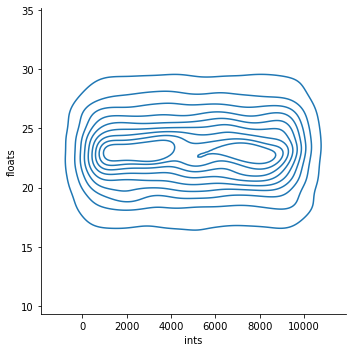

In [25]:
sns.displot(x = "ints", y = 'floats', kind = "kde", data = df)

<AxesSubplot:xlabel='ints', ylabel='floats'>

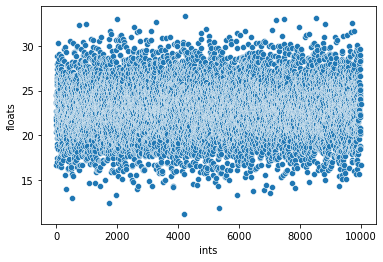

In [26]:
sns.scatterplot(x = "ints", y = 'floats', data = df)

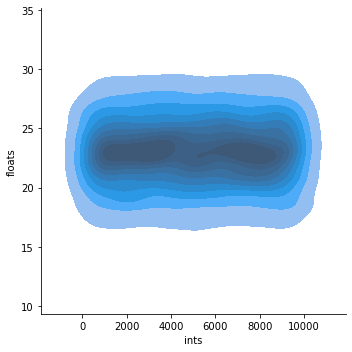

In [27]:
sns.displot(x = "ints",  y = "floats", kind = "kde", data = df, fill = True)

 The histogram of the distribution has a rectangular shape. Furthermore, it appears that all outcomes are equally likely. For these reasons, I would say the data has a uniform distribution.

<AxesSubplot:xlabel='ints', ylabel='Count'>

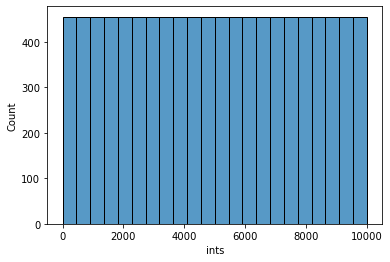

In [28]:
sns.histplot(data=df, x="ints")

# Question 3 <a class="anchor" id="question3"></a>
If you were asked to impute null values in a column of a file that was 365 Gigabytes, what would you do?  What tools would you use? What tools would you NOT use?

Answer:

I would not use basic python or R. I would most likely use something like pyspark that would allow me to work with such a large dataset. Through in-memory caching, and optimized query execution, Spark can work with data of any size.

# Question 4 <a class="anchor" id="question4"></a>

What would you do if you were asked to do the above task every Thursday morning at 2:00am?

Answer: I would write a script to try and automate this task. 


# Question 5 <a class="anchor" id="question5"></a>

Who is your favorite mathematician, statistician or computer scientist and why?

Answer:

My favorite mathematician is Sirinivasa Ramanujan. As someone who did not come from a traditional background, I find his story to be relatable and inspirational. He had no formal education, yet he pioneered entire branches of mathematics. That is amazing. To this day much of his work is still not fully understood! He was a unique person and perhaps the greatest mathematician of all time.
